In [1]:
#27.11.2018
from numpy import *
#%pylab inline
from pylab import *
#for ploting 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
import AD_module as ad
import numpy as np
import ctypes

In [3]:
## Before running
## Compile the code with :
# python Python_setup_ILC.py build_ext -i -lcfitsio --inplace

In [4]:
#Initialization
Ntau = 7
tau_time = [3.0, 6.0, 10.0, 20.0, 40.0, 100.0, 200.0]
tau_time = np.asarray(tau_time)
ratio = [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]
ratio = np.asarray(ratio)

In [5]:
time = []
flux = []
fluxerr = []
with open('Output_Lstar.txt') as f:
    for line in f:
        data = line.split()
        #print float(data[0])
        time.append(float(data[0]))
        flux.append(float(data[1]))
        fluxerr.append(float(data[2]))
time = np.asarray(time)
flux = np.asarray(flux)
fluxerr = np.asarray(fluxerr)
print time       
print len(time)
Ntime = len(time)
print time[0]
time = time-time[0]
print time
time = time-8 #days 
print time
#print time[Ntime-1]
print (time[Ntime-1]-time[0])
#time = time+(time[Ntime-1]-time[0])
#print time
mean_F = mean(flux)
print mean_F
flux = flux / mean_F

[5914.7813 5914.9485 5915.1157 ... 6962.6193 6962.7865 6962.9537]
6270
5914.7813
[0.0000000e+00 1.6720000e-01 3.3440000e-01 ... 1.0478380e+03 1.0480052e+03
 1.0481724e+03]
[  -8.       -7.8328   -7.6656 ... 1039.838  1040.0052 1040.1724]
1048.1724000000004
2.538529051036683


/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


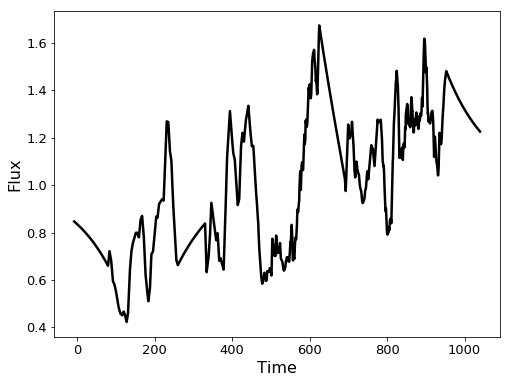

In [6]:
#if I want to save it in pdf
import datetime
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import matplotlib.lines as lns
from numpy.random import normal
#import matplotlib as mpl
#mpl.rcParams['axes.linewidth'] = 2 #set the value globally

font = {'family' : 'normal',
        'weight' : 'normal', #bold',
        'size'   : 13}
matplotlib.rc('font', **font) # it is for the tickness of axis and label
#You can find a full list of available properties on the Customizing matplotlib page.

# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.
with PdfPages('LC_Output_Lstar.pdf') as pdf:
    #plt.rc('text', usetex=True)
    plt.figure(figsize=(8, 6))
    plt.plot(time, flux, 'k', linewidth=2.5)#, label='UVW2 Swift band passes')
    #plt.legend(('UVW2 Swift band passes','rescaled'), loc = 0)
    #plt.hist(alpha_obs1, bins=20, histtype='step', color='k')
    #plt.legend(('all data'), loc = 0)
    #plt.vlines(x=-1.5, ymin=0, ymax=80, color="black", linewidth=1, linestyle="--", zorder=-1)
    #plt.text(-1.5, 100, 'IPD', fontsize=20)
    #plt.text(-1.5, 100, 'all data', fontsize=20)
    plt.ylabel('Flux', size =16)
    plt.xlabel('Time', size =16)
    ## set axis limits
    #plt.ylim(0, 1)
    #plt.xlim(1500, 3500)
    #pdf.savefig()
    #plt.close() #If I don't want to see plot in the screen like below I can open this one

In [7]:
#2) Compute UVW2 LC assuming illuminating source (Flux)
#follow the UVW2 fitted with the acretion disk model
Filter=np.array([1,1,1,0,1,1])

In [8]:
ad.AD_py(6,Filter, time, flux, ratio, tau_time, Ntime, Ntau)

0

In [9]:
T = []
FLUX = []
with open('lc_U_disk.txt') as f:
    for line in f:
        data = line.split()
        #print float(data[0])
        T.append(float(data[0]))
        FLUX.append(float(data[1]))
T = np.asarray(T)
FLUX = np.asarray(FLUX)
FLUX = FLUX*1e28

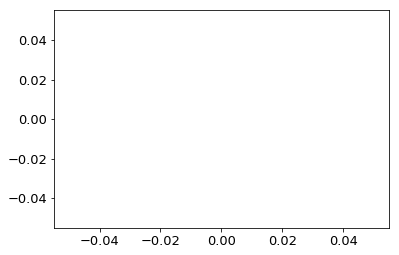

In [10]:
plt.plot(T, FLUX, 'k', linewidth=2.5)

(2.485, 2.495)

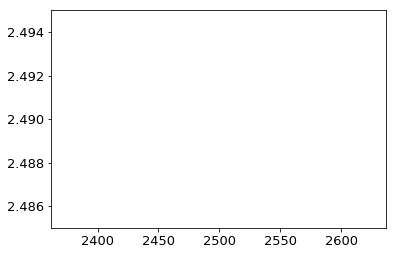

In [11]:
plt.plot(T, FLUX, 'k', linewidth=2.5)
plt.ylim(2.485, 2.495)
#plt.xlim(1500, 3500)

In [12]:
time_obs = []
flux_obs = []
fluxerr_obs = []
with open('Filter/U_timeflux.txt') as f:
    for line in f:
        data = line.split()
        #print float(data[0])
        time_obs.append(float(data[0]))
        flux_obs.append(float(data[1]))
time_obs = np.asarray(time_obs)
flux_obs = np.asarray(flux_obs)
fluxerr_obs = np.asarray(fluxerr)
print time_obs[0]
time_obs = time_obs-time_obs[0]
time_obs = time_obs-8 #days 
#print time_obs
mean_flux_obs = mean(flux_obs)
print mean_flux_obs
flux_obs = flux_obs / mean_flux_obs

2454270.83
1.9411063829787234


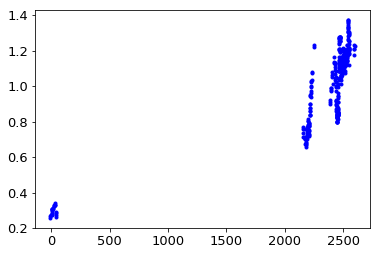

In [13]:
plt.plot(time_obs, flux_obs, 'b.', linewidth=2.5)

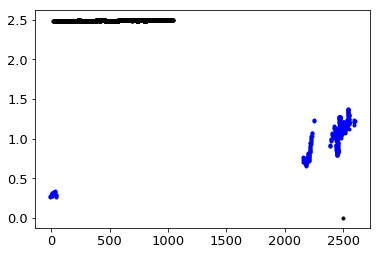

In [14]:
plt.plot(T, FLUX, 'k.', linewidth=2.5)
plt.plot(time_obs, flux_obs, 'b.', linewidth=2.5)